In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import time
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import chart_studio.plotly as py

In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username=os.environ.get('plotly_username'), api_key=os.environ.get('plotly_api_key'))

In [3]:
pd.options.display.max_columns = 75
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 50

In [4]:
us_daily_df = pd.read_json('https://api.covidtracking.com/v1/us/daily.json')

In [5]:
us_daily_df['date'] = pd.to_datetime(us_daily_df['date'],format='%Y%m%d')

In [6]:
#calculating dates
dates_days = pd.date_range(start='1/31/2020', end= dt.datetime.now())

yesterday = dates_days[-2]
two_days_ago = dates_days[-3]
one_week_ago = dates_days[-8]

In [7]:
us_daily_df.set_index('date', drop=True, inplace=True)

In [8]:
us_daily_df.sort_index(inplace=True)

In [9]:
us_daily_df_new_per_day = us_daily_df[['positive','hospitalizedCumulative','death']].diff(periods=1)

In [10]:
us_daily_df_new_per_day_rolling = us_daily_df_new_per_day.rolling(window=7).mean()

In [11]:
def change_text(change):
    '''
    This function defines the % change subtext in the top stats part
    '''
    if change > 0:
        return "↑ " + str("{:.0%}".format(change)+' 7-day Trend')
    elif change < 0:
        return "↓ " + str("{:}%".format(change)+' 7-day Trend')
    elif change == 0:
        return "No Change 7-day Trend"
    else:
        pass

def change_color(change):
    '''
    This function defines the % change subtext in the top stats part
    '''
    if change > 0:
        return "red"
    elif change < 0:
        return "green"
    elif change == 0:
        return "grey"
    else:
        pass


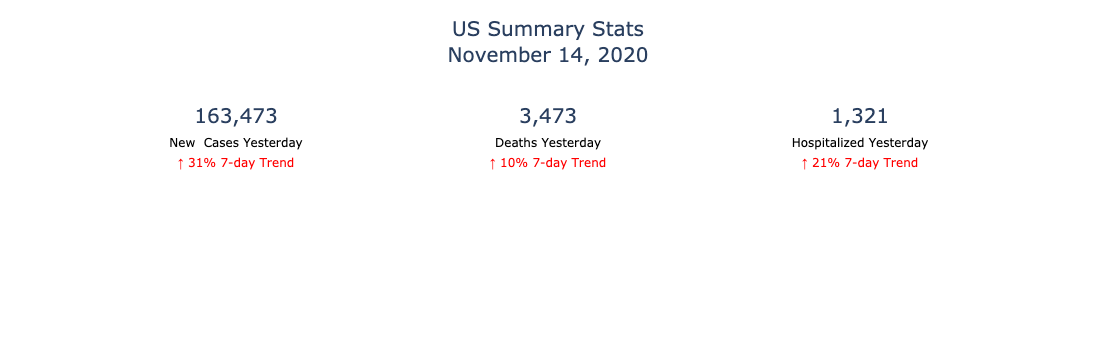

In [12]:
#Summary Stats

us_cases_yesterday = us_daily_df_new_per_day.loc[yesterday]['positive']
us_cases_death = us_daily_df_new_per_day.loc[yesterday]['death']
us_cases_hospitalized = us_daily_df_new_per_day.loc[yesterday]['hospitalizedCumulative']

us_cases_seven_day_trend = us_daily_df_new_per_day_rolling.loc[yesterday]['positive'] / us_daily_df_new_per_day_rolling.loc[one_week_ago]['positive'] - 1
us_death_seven_day_trend = us_daily_df_new_per_day_rolling.loc[yesterday]['death'] / us_daily_df_new_per_day_rolling.loc[one_week_ago]['death'] - 1
us_hospitalized_seven_day_trend = us_daily_df_new_per_day_rolling.loc[yesterday]['hospitalizedCumulative'] / us_daily_df_new_per_day_rolling.loc[one_week_ago]['hospitalizedCumulative'] - 1



fig0 = go.Figure(data=[go.Table(
    header=dict(values=['{:,}'.format(int(us_cases_yesterday)), '{:,}'.format(int(us_cases_hospitalized)), '{:,}'.format(int(us_cases_death))],
                fill_color='white',
                align='center',
               font_size=20,
                   height=30),
    cells=dict(values=[['New  Cases Yesterday', change_text(us_cases_seven_day_trend)], # 1st column
                       ['Deaths Yesterday', change_text(us_death_seven_day_trend)],
                      ['Hospitalized Yesterday',change_text(us_hospitalized_seven_day_trend)]], # 2nd column
               fill_color='white',
               font_color=[['black',change_color(us_cases_seven_day_trend)],['black',change_color(us_death_seven_day_trend)],['black',change_color(us_hospitalized_seven_day_trend)]],
               align='center')),
    
])

fig0.update_layout(height=50, autosize=True, title={
        'text': "US Summary Stats<br>"+ yesterday.strftime("%B %d, %Y"),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20})

py.iplot(fig0, filename = 'us_summary_stats')

fig0.show()

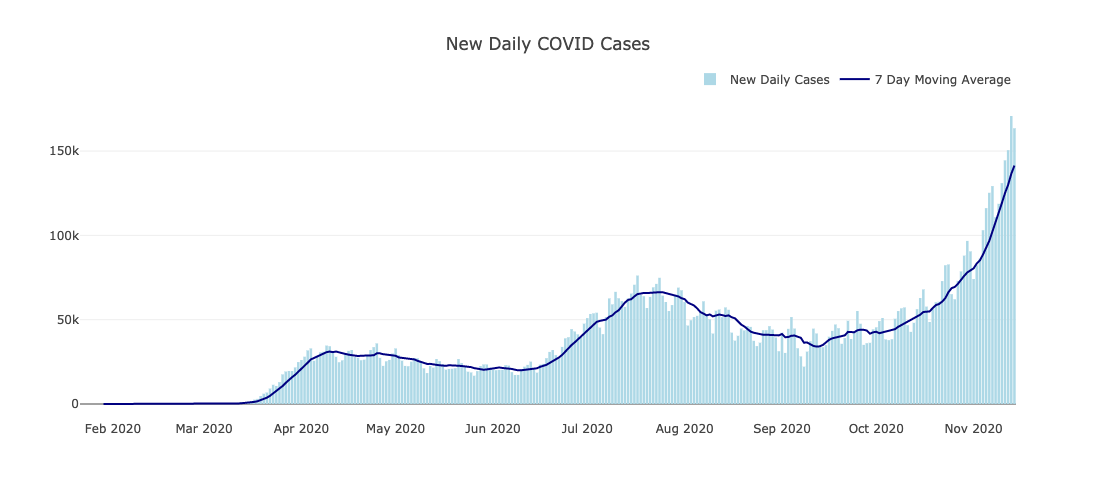

In [13]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=us_daily_df_new_per_day.index, y=us_daily_df_new_per_day['positive'], marker_color='lightblue', name= 'New Daily Cases'))
fig1.add_trace(go.Scatter(x=us_daily_df_new_per_day_rolling.index, y=us_daily_df_new_per_day_rolling['positive'], marker_color='#000080', name = '7 Day Moving Average'))


fig1.update_layout(template='none', height=500, autosize=True, title='New Daily COVID Cases',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
py.iplot(fig1, filename = 'us_new_daily_covid_cases')
fig1.show()

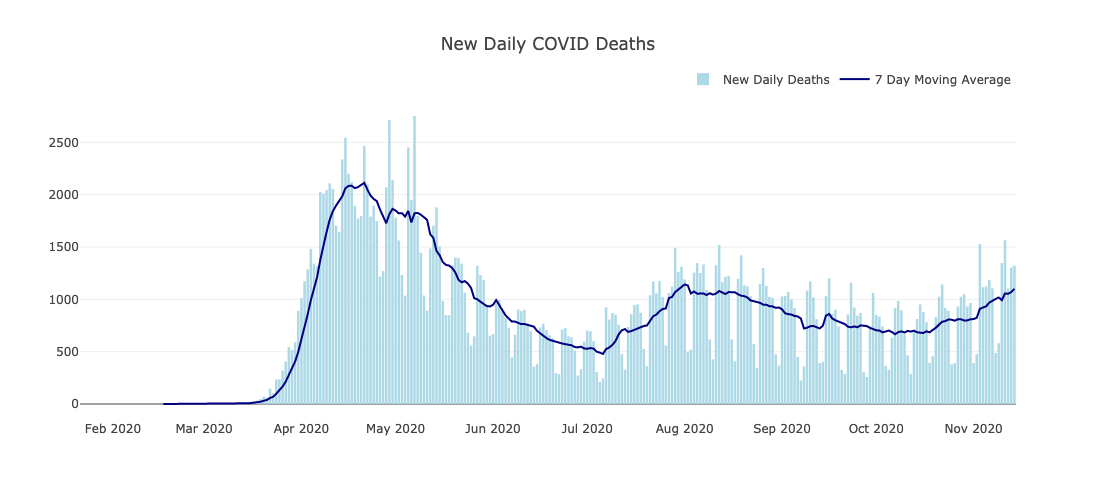

In [14]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=us_daily_df_new_per_day.index, y=us_daily_df_new_per_day['death'], marker_color='lightblue', name= 'New Daily Deaths'))
fig2.add_trace(go.Scatter(x=us_daily_df_new_per_day_rolling.index, y=us_daily_df_new_per_day_rolling['death'], marker_color='#000080', name = '7 Day Moving Average'))


fig2.update_layout(template='none', height=500, autosize=True, title='New Daily COVID Deaths',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
py.iplot(fig2, filename = 'us_new_daily_covid_deaths')
fig2.show()

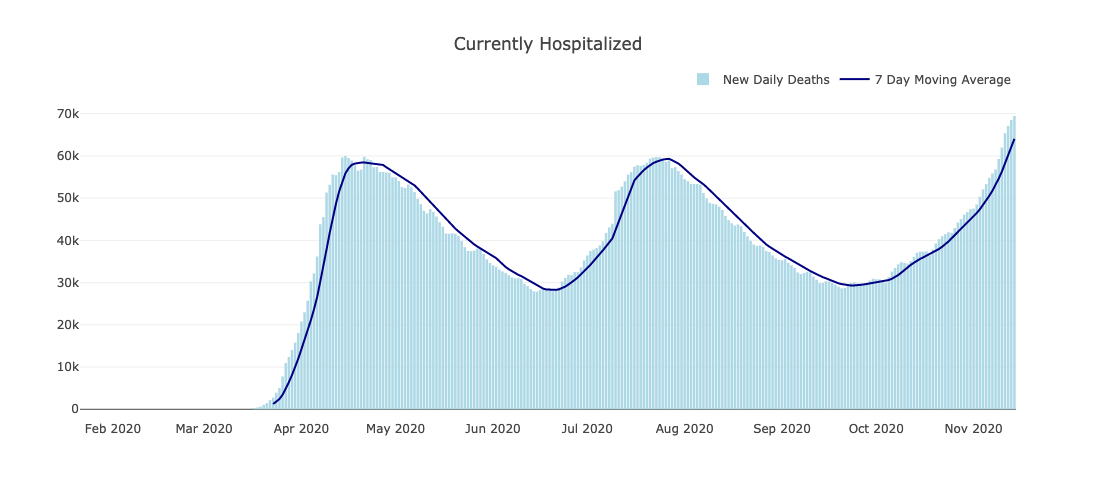

In [15]:
fig3 = go.Figure()


fig3.add_trace(go.Bar(x=us_daily_df.index, y=us_daily_df['hospitalizedCurrently'], marker_color='lightblue', name= 'New Daily Deaths'))

df = us_daily_df[['hospitalizedCurrently']].rolling(window=7).mean()
fig3.add_trace(go.Scatter(x=df.index, y=df['hospitalizedCurrently'], marker_color='#000080', name = '7 Day Moving Average'))


fig3.update_layout(template='none', height=500, autosize=True, title='Currently Hospitalized',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
py.iplot(fig3, filename = 'us_new_daily_covid_hospitalized')
fig3.show()

# State Data

In [16]:
us_states_cases_df = pd.read_json('https://api.covidtracking.com/v1/states/daily.json')

In [17]:
us_states_cases_df['date'] = pd.to_datetime(us_states_cases_df['date'],format='%Y%m%d')

In [18]:
us_states_cases_df.sort_values(by='date', ascending=True, inplace=True)

In [19]:
us_states_cases_df.set_index(['state','date'], drop=True, inplace=True)

In [20]:
state_list = us_states_cases_df.index.get_level_values(level=0).unique().tolist()

In [21]:
def new_daily_cases(lst):
    '''
    Since the data is cumluative, this function calculates the daily change
    '''
    
    df_new_cases = pd.DataFrame()
    df_new_cases_rolling = pd.DataFrame()
    
    for i in lst:
        state_df = us_states_cases_df[us_states_cases_df.index.isin([i], level=0)][['positive','hospitalizedCumulative','death']].diff(periods=1)
        df_new_cases = pd.concat([df_new_cases,state_df])
        
        df_rolling = state_df.rolling(window=7).mean()
        df_new_cases_rolling = pd.concat([df_new_cases_rolling,df_rolling])
        
    return df_new_cases, df_new_cases_rolling
    

In [22]:
us_state_daily_cases, us_state_daily_cases_rolling = new_daily_cases(state_list)

In [23]:
us_state_and_rolling = pd.merge(us_state_daily_cases, us_state_daily_cases_rolling, how='inner', left_index=True, right_index=True, suffixes = ['_new','_rolling'])

In [24]:
state_codes = pd.DataFrame({'state_name': {0: 'Alabama', 1: 'Alaska', 2: 'American Samoa', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 6: 'Colorado', 7: 'Connecticut', 8: 'Delaware', 9: 'District Of Columbia', 10: 'Florida', 11: 'Georgia', 12: 'Guam', 13: 'Hawaii', 14: 'Idaho', 15: 'Illinois', 16: 'Indiana', 17: 'Iowa', 18: 'Kansas', 19: 'Kentucky', 20: 'Louisiana', 21: 'Maine', 22: 'Maryland', 23: 'Massachusetts', 24: 'Michigan', 25: 'Minnesota', 26: 'Mississippi', 27: 'Missouri', 28: 'Montana', 29: 'Nebraska', 30: 'Nevada', 31: 'New Hampshire', 32: 'New Jersey', 33: 'New Mexico', 34: 'New York', 35: 'North Carolina', 36: 'North Dakota', 37: 'Northern Mariana Is', 38: 'Ohio', 39: 'Oklahoma', 40: 'Oregon', 41: 'Pennsylvania', 42: 'Puerto Rico', 43: 'Rhode Island', 44: 'South Carolina', 45: 'South Dakota', 46: 'Tennessee', 47: 'Texas', 48: 'Utah', 49: 'Vermont', 50: 'Virginia', 51: 'Virgin Islands', 52: 'Washington', 53: 'West Virginia', 54: 'Wisconsin', 55: 'Wyoming'}, 'abbreviation': {0: 'AL', 1: 'AK', 2: 'AS', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'GU', 13: 'HI', 14: 'ID', 15: 'IL', 16: 'IN', 17: 'IA', 18: 'KS', 19: 'KY', 20: 'LA', 21: 'ME', 22: 'MD', 23: 'MA', 24: 'MI', 25: 'MN', 26: 'MS', 27: 'MO', 28: 'MT', 29: 'NE', 30: 'NV', 31: 'NH', 32: 'NJ', 33: 'NM', 34: 'NY', 35: 'NC', 36: 'ND', 37: 'MP', 38: 'OH', 39: 'OK', 40: 'OR', 41: 'PA', 42: 'PR', 43: 'RI', 44: 'SC', 45: 'SD', 46: 'TN', 47: 'TX', 48: 'UT', 49: 'VT', 50: 'VA', 51: 'VI', 52: 'WA', 53: 'WV', 54: 'WI', 55: 'WY'}})

In [25]:
state_populations = pd.DataFrame({'State': {0: 'California', 1: 'Texas', 2: 'Florida', 3: 'New York', 4: 'Illinois', 5: 'Pennsylvania', 6: 'Ohio', 7: 'Georgia', 8: 'North Carolina', 9: 'Michigan', 10: 'New Jersey', 11: 'Virginia', 12: 'Washington', 13: 'Arizona', 14: 'Massachusetts', 15: 'Tennessee', 16: 'Indiana', 17: 'Missouri', 18: 'Maryland', 19: 'Wisconsin', 20: 'Colorado', 21: 'Minnesota', 22: 'South Carolina', 23: 'Alabama', 24: 'Louisiana', 25: 'Kentucky', 26: 'Oregon', 27: 'Oklahoma', 28: 'Connecticut', 29: 'Utah', 30: 'Iowa', 31: 'Nevada', 32: 'Arkansas', 33: 'Mississippi', 34: 'Kansas', 35: 'New Mexico', 36: 'Nebraska', 37: 'West Virginia', 38: 'Idaho', 39: 'Hawaii', 40: 'New Hampshire', 41: 'Maine', 42: 'Montana', 43: 'Rhode Island', 44: 'Delaware', 45: 'South Dakota', 46: 'North Dakota', 47: 'Alaska', 48: 'DC', 49: 'Vermont', 50: 'Wyoming'}, 'July 2019 Estimate': {0: 39512223.0, 1: 28995881.0, 2: 21477737.0, 3: 19453561.0, 4: 12671821.0, 5: 12801989.0, 6: 11689100.0, 7: 10617423.0, 8: 10488084.0, 9: 9986857.0, 10: 8882190.0, 11: 8535519.0, 12: 7614893.0, 13: 7278717.0, 14: 6949503.0, 15: 6833174.0, 16: 6732219.0, 17: 6137428.0, 18: 6045680.0, 19: 5822434.0, 20: 5758736.0, 21: 5639632.0, 22: 5148714.0, 23: 4903185.0, 24: 4648794.0, 25: 4467673.0, 26: 4217737.0, 27: 3956971.0, 28: 3565287.0, 29: 3205958.0, 30: 3155070.0, 31: 3080156.0, 32: 3017825.0, 33: 2976149.0, 34: 2913314.0, 35: 2096829.0, 36: 1934408.0, 37: 1792147.0, 38: 1787065.0, 39: 1415872.0, 40: 1359711.0, 41: 1344212.0, 42: 1068778.0, 43: 1059361.0, 44: 973764.0, 45: 884659.0, 46: 762062.0, 47: 731545.0, 48: 705749.0, 49: 623989.0, 50: 578759.0}})

In [26]:
us_state_and_rolling_reset = us_state_and_rolling.reset_index()

us_states_daily_df_codes = pd.merge(us_state_and_rolling_reset,state_codes,how='inner',left_on='state',right_on='abbreviation')

us_states_daily_df_population = pd.merge(us_states_daily_df_codes,state_populations,how='inner',left_on='state_name',right_on='State')


In [27]:
us_states_daily_df_population['cases_per_hundred_thousand'] = us_states_daily_df_population['positive_new'] / (us_states_daily_df_population['July 2019 Estimate'] / 100000)

In [68]:
us_states_daily_df_population[us_states_daily_df_population['date'] >= one_week_ago].groupby(['state','state_name']).mean().reset_index()

state      state_name  positive_new  hospitalizedCumulative_new  \
0     AK          Alaska    442.714286                         NaN   
1     AL         Alabama   1908.714286                  140.142857   
2     AR        Arkansas   1355.714286                   61.714286   
3     AZ         Arizona   2238.428571                  109.571429   
4     CA      California   7345.714286                         NaN   
5     CO        Colorado   4224.142857                  135.714286   
6     CT     Connecticut   1502.857143                    0.000000   
7     DE        Delaware    305.285714                         NaN   
8     FL         Florida   5297.714286                  201.714286   
9     GA         Georgia   1881.714286                  111.571429   
10    HI          Hawaii    104.142857                    6.714286   
11    IA            Iowa   3785.714286                         NaN   
12    ID           Idaho   1269.857143                   39.571429   
13    IL        Illinois  12143.857143                         NaN   
14    IN         Indiana   5595.000000                  301.428571   
15    KS          Kansas   2553.428571                   37.142857   
16    KY        Kentucky   2353.714286                  134.142857   
17    LA       Louisiana   1466.571429                         NaN   
18    MA   Massachusetts   2366.571429                   30.714286   
19    MD        Maryland   1596.428571                  118.714286   
20    ME           Maine    169.714286                    7.000000   
21    MI        Michigan   6684.142857                         NaN   
22    MN       Minnesota   5867.714286                  217.285714   
23    MO        Missouri   4379.428571                         NaN   
24    MS     Mississippi   1065.000000                   26.571429   
25    MT         Montana    991.142857                   82.428571   
26    NC  North Carolina   2553.285714                         NaN   
27    ND    North Dakota   1381.142857                   42.142857   
28    NE        Nebraska   2032.714286                   39.428571   
29    NH   New Hampshire    295.714286                    1.857143   
30    NJ      New Jersey   3164.857143                   98.000000   
31    NM      New Mexico   1373.142857                   64.571429   
32    NV          Nevada   1465.714286                         NaN   
33    NY        New York   4420.428571                    0.000000   
34    OH            Ohio   6359.428571                  240.142857   
35    OK        Oklahoma   2636.285714                  119.000000   
36    OR          Oregon    918.714286                   35.714286   
37    PA    Pennsylvania   4564.714286                         NaN   
38    RI    Rhode Island    622.000000                   28.285714   
39    SC  South Carolina   1324.571429                   49.714286   
40    SD    South Dakota   1458.000000                   70.000000   
41    TN       Tennessee   3843.571429                   67.285714   
42    TX           Texas   9087.285714                         NaN   
43    UT            Utah   2986.571429                   93.714286   
44    VA        Virginia   1418.000000                  143.000000   
45    VT         Vermont     70.857143                         NaN   
46    WA      Washington   1608.142857                   67.857143   
47    WI       Wisconsin   6585.857143                  214.142857   
48    WV   West Virginia    721.428571                         NaN   
49    WY         Wyoming    754.857143                   10.714286   

     death_new  positive_rolling  hospitalizedCumulative_rolling  \
0     2.000000        470.795918                             NaN   
1    23.428571       1610.367347                      135.857143   
2    11.428571       1432.061224                       56.102041   
3    21.857143       1948.408163                      104.204082   
4    39.857143       6375.653061                             NaN   
5     9.428571       344

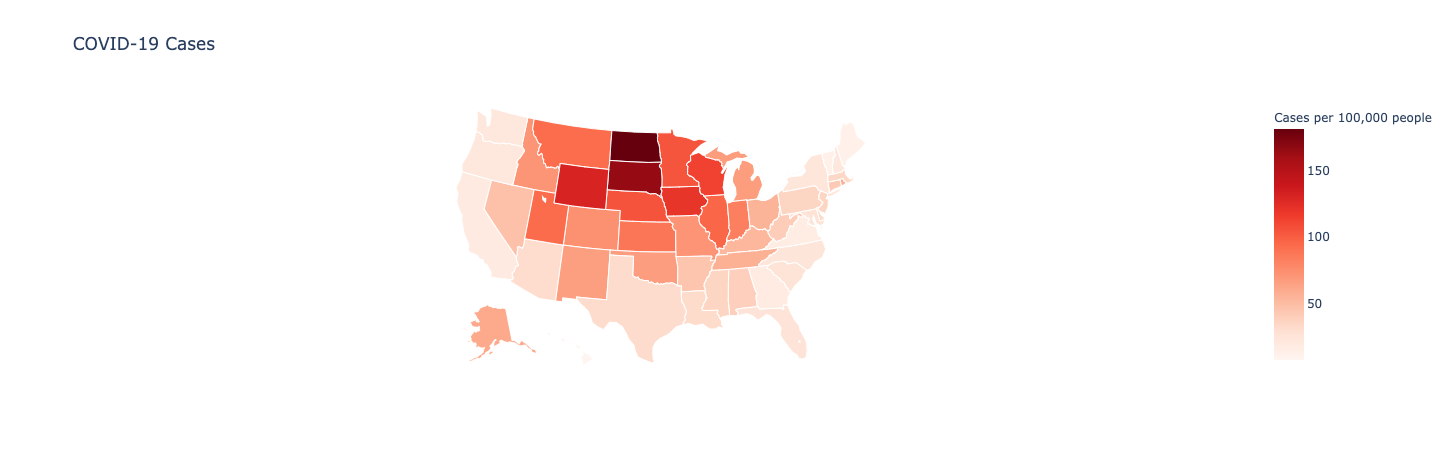

In [77]:
##Yesterdays average
#df = us_states_daily_df_population[us_states_daily_df_population['date'] == yesterday]

##One week average
df = us_states_daily_df_population[us_states_daily_df_population['date'] >= one_week_ago].groupby(['state','state_name']).mean().reset_index()

df['text'] = df.apply(lambda x: x['state_name'] +'<br>' + 'New Cases Last 7 Days Avg: ' + '{:,.0f}'.format(x['positive_new']) + '<br>' + 'Per 100,000 people: ' + '{:,.0f}'.format(x['cases_per_hundred_thousand']),axis=1)
#df['state_name'] + '<br>' + 'Last 7 Days Average ' + df['positive_new'].astype('str') + '<br>' + 'Per 100,000 ' + df['cases_per_hundred_thousand'].astype('str')

fig4 = go.Figure(data=go.Choropleth(
    locations=df['state'],
    z=df['cases_per_hundred_thousand'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Cases per 100,000 people",
    hoverinfo="text"
))

fig4.update_layout(
    title_text='COVID-19 Cases',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

py.iplot(fig4, filename = 'covid_cases_by_state_map')
fig4.show()

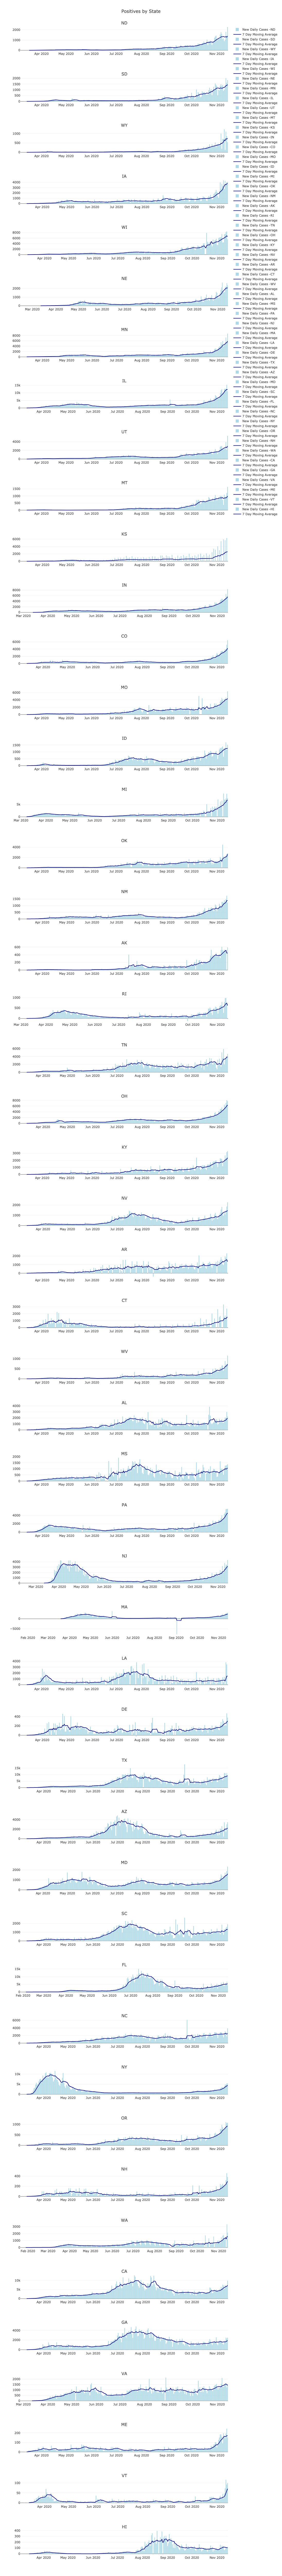

PlotlyRequestError: This file is too big! Your current subscription is limited to 524.288 KB uploads. For more information, please visit: https://plotly.com/get-pricing/.

In [66]:
df = us_states_daily_df_population[us_states_daily_df_population['date'] >= one_week_ago].groupby(['state','state_name']).mean().reset_index()

state_list_sorted =  df.sort_values(by='cases_per_hundred_thousand', ascending=False)['state'].to_list()

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig5 = make_subplots(rows=len(state_list_sorted), cols=1, subplot_titles=state_list_sorted)

for i in state_list_sorted:
    df = us_state_daily_cases.loc[i]
    df_rolling = us_state_daily_cases_rolling.loc[i]
    
    fig5.add_trace(go.Bar(x=df.index, y=df['positive'], marker_color='lightblue', name= 'New Daily Cases -'+i), row=state_list_sorted.index(i)+1, col=1)
    fig5.add_trace(go.Scatter(x=df_rolling.index, y=df_rolling['positive'], marker_color='#000080', name = '7 Day Moving Average'), row=state_list_sorted.index(i)+1, col=1)


fig5.update_layout(template='none', height=10000, autosize=True, title='Positives by State')
fig5.show()   

py.iplot(fig5, filename = 'covid_cases_by_state_subplots')

In [ ]:
us_states_daily_df_new_per_day = us_states_daily_df[['positive','hospitalizedCumulative','death']].diff(periods=1)

In [ ]:
us_states_daily_df_new_per_day.loc['MN']

In [ ]:
os.remove('covid_dashboard.html')

with open('covid_dashboard.html', 'a') as f:
    f.write("<style>* { font-family: 'Helvetica Neue'} </style>")
    f.write("<h1>COVID-19 Dashboard<h1>")
    f.write("<h3>"+datetime.datetime.now().strftime("%B %d, %Y")+"<h3>")
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))